In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Hypothesis 1 : In Australia, men are more likely to be attacked by a shark while surfing then woman

In [3]:
dfaus =pd.read_csv("data/M_W_in_Aus.csv", encoding = "ISO-8859-1",index_col =0)
dfaus

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal(Y/N),Time,Species,InvestigatororSource
10,24-May-2018,2018,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,unknown,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018"
21,25-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",surfing,M,60,"No injury, knocked off board by shark",N,09h30,3 m shark,"B.Myatt, GSAF"
36,14-Mar-2018,2018,Unprovoked,AUSTRALIA,Western Australia,Waterman's Bay,unknown,M,10,Minor injuries to legs,N,17h35,Wobbegong shark,"B. Myatt, GSAF"
37,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,swimming,M,69,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF"
38,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,surfing,M,18,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,26-Jan-1912,1912,Unprovoked,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",swimming,M,21,FATAL,Y,15h00,"2.8 m [9'3""] whaler shark captured 3 days late...","Argus (Melbourne) 1/27, 28, 29, 30/1912; G.P. ..."
5498,26-Mar-1905,1905,Unprovoked,AUSTRALIA,New South Wales,Lismore,swimming,M,40,Righ thigh severely bitten,N,Morning,5' shark,"Adelaide Advertiser, 3/31/1905"
5648,28-Nov-1894,1894,Unprovoked,AUSTRALIA,New South Wales,Newcastle,swimming,M,19,"""Lost his arm""",N,Morning,10' to 12' shark,"Brisbane Courier, 1/7/1895, p.5"
5684,02-Mar-1892,1892,Provoked,AUSTRALIA,New South Wales,Lake Macquarie,fishing,M,21,Lacerations to calf by netted shark PROVOKED I...,N,Night,12' shark,"The Argus, 3/4/1892"


In [4]:
count=dfaus["Sex"].value_counts()
count

M    277
F     30
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

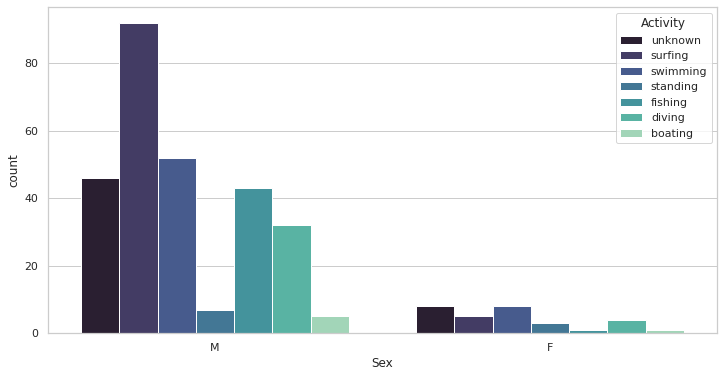

In [5]:
sns.countplot(x=dfaus.Sex, hue=dfaus.Activity,palette="mako")



Here from the small sample size we have be able to take from the original dataframe, 
we can see that only 5% of the attacks in Australia have be on women.
Having done a value count of the whole dataframe we can see that this % is more or less correct as in general, only 7% of the 
attacks are on women.




To be able to make a graph where it shows the attacks over time and the difference between males and females,
first i had to create a new data set showing the count of attacks by year. With this dataframe i have the values of attacks
per year by sex.


In [6]:
dff = dfaus[["Year", "Sex"]]
dff.head()

,Year,Sex
10,2018,M
21,2018,M
36,2018,M
37,2018,M
38,2018,M


In [7]:
dff["year_sex"] = dff["Sex"].groupby(dff["Year"]).transform("count")

/tmp/ipykernel_989/3392935965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["year_sex"] = dff["Sex"].groupby(dff["Year"]).transform("count")


In [8]:
#type(dff)


In [9]:
dff.drop_duplicates( inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
dff.head()

,Year,Sex,year_sex
10,2018,M,7
40,2018,F,7
63,2017,M,8
71,2017,F,8
196,2016,M,11


In [11]:
dff.dtypes

Year         int64
Sex         object
year_sex     int64
dtype: object

In [12]:
dff["Year"] = dff["Year"].astype(int)

/tmp/ipykernel_989/1460845437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Year"] = dff["Year"].astype(int)


In [13]:
dff

,Year,Sex,year_sex
10,2018,M,7
40,2018,F,7
63,2017,M,8
71,2017,F,8
196,2016,M,11
...,...,...,...
5375,1912,M,1
5498,1905,M,1
5648,1894,M,1
5684,1892,M,1


<AxesSubplot:xlabel='Year', ylabel='year_sex'>

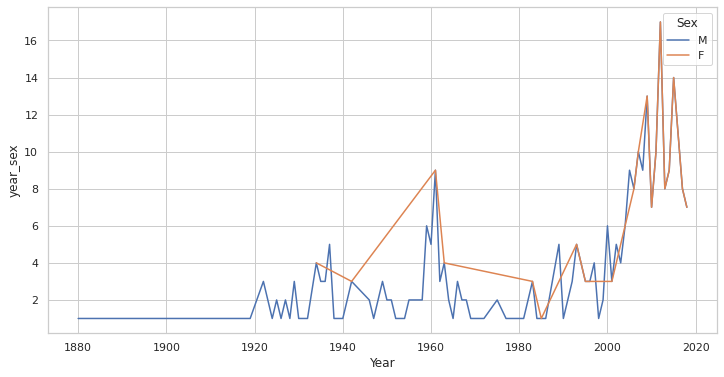

In [14]:
sns.lineplot(data=dff, x="Year", y="year_sex", hue = "Sex",)


This linegraph is not optimal due to the lack of data, but we can see that until 2006 there was no data of women being attacked
by sharks in Australia. The data for the males seems to be the same from 1960 until 1989 where there was a spike in the attacks.
From 2006 onwards it seems like the data is more accurate as it shows a clearer pattern of attacks, for both men and women.


## Hypothese 2: In the USA, the attacks are usually unprovoked by humans

In [15]:
df1us =pd.read_csv("data/unprovoked.csv", encoding = "ISO-8859-1", index_col =0)


In [16]:
df1us["Fatal (Y/N)"].value_counts()

N          1837
Unknown     188
Y           186
UNKNOWN      18
Name: Fatal (Y/N), dtype: int64

In [17]:
df1us.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species '],
      dtype='object')

<AxesSubplot:xlabel='Type', ylabel='Count'>

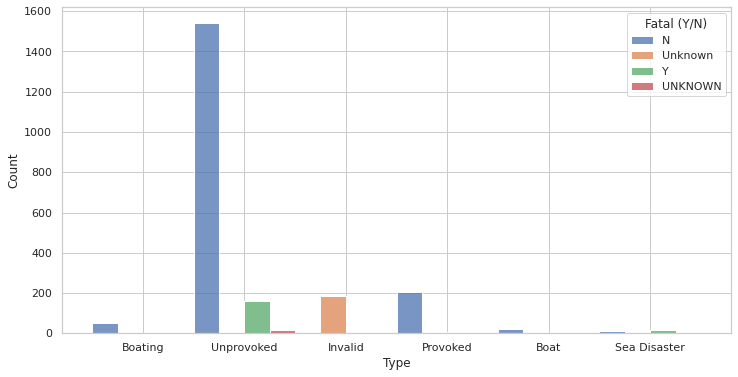

In [18]:
sns.histplot(x=df1us.Type, bins =30, hue= df1us['Fatal (Y/N)'], multiple="dodge")


From this data, we can clearly see that most attacks in the US are unprovoked. This chart also shows that the majority of the 
attacks that were fatal are also unprovoked. This is normal due to the difference in the ammount of data. The only type of attack
where the the fatality is higher then the non-fatality rate is when a sea disaster occurs. This could also be because of the sea
disaster not only from the shark attacks.

## Hypotheses 3: Hawaii is the area in the US where most shark attacks occur

In [19]:
df2us =pd.read_csv("data/hawaii.csv", encoding = "ISO-8859-1",index_col =0)
df2us

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,nueva
5749,Mid-Aug-1886,1886.0,Boating,USA,New Jersey,"Shrewsbury River, Highlands, Monmouth County",NaN,M,NaN,"Shark attacked boat, shark killed & towed to s...",N,NaN,Shark was said to Âhave a very rough Â½Â-thi...,Others
4620,06-Aug-1945,1945.0,Unprovoked,USA,North Carolina,Ocracoke,NaN,NaN,NaN,FATAL,Y,NaN,NaN,Others
1834,17-Aug-2002,2002.0,Unprovoked,USA,Alabama,"Gulf of Mexico, 65 miles offshore from Mobile",Swimming,F,29,Both arms & leg bitten,N,17h00,NaN,Alabama
2051,09-Jun-2000,2000.0,Unprovoked,USA,Alabama,"Gulf Shores, Baldwin County",Swimming,M,44,Right forearm severed surgically amputated abo...,N,06h45,Bull shark,Alabama
5811,13-Jun-1881,1881.0,Unprovoked,USA,Alabama,Mobile Bay,Fell overboard,M,23,FATAL,Y,NaN,NaN,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,12-Apr-1989,1989.0,Unprovoked,USA,Washington,"Pacific Beach, Grays Harbor County",Surfing (lying prone on his board),M,NaN,Forearm bitten,N,10h45,White shark,Others
3496,14-Dec-1967,1967.0,Provoked,USA,Unknown,NaN,NaN,M,NaN,"Head, shoulder, arm lacerated. Recorded as PRO...",N,NaN,NaN,Others
5514,1904,1904.0,Invalid,USA,Unknown,NaN,Diving on a wreck,M,NaN,Leg bitten,Unknown,NaN,Questionable,Others
6125,Aug-24-1806,1896.0,Sea Disaster,USA,Unknown,NaN,NaN,M,NaN,Shark scavenged on the dead sailors,Unknown,NaN,NaN,Others


In [20]:
df2us["nueva"].value_counts()

Florida           1037
Hawaii             298
California         290
South Carolina     159
North Carolina     101
Texas               73
Others              69
New Jersey          52
New York            30
Oregon              29
Virginia            19
Massachusetts       16
Puerto Rico         16
Alabama             15
Georgia             14
Louisiana           11
Name: nueva, dtype: int64

[Text(0, 0, 'Others'),
 Text(1, 0, 'Alabama'),
 Text(2, 0, 'California'),
 Text(3, 0, 'Florida'),
 Text(4, 0, 'Georgia'),
 Text(5, 0, 'Hawaii'),
 Text(6, 0, 'Louisiana'),
 Text(7, 0, 'Massachusetts'),
 Text(8, 0, 'New Jersey'),
 Text(9, 0, 'New York'),
 Text(10, 0, 'North Carolina'),
 Text(11, 0, 'Oregon'),
 Text(12, 0, 'Puerto Rico'),
 Text(13, 0, 'South Carolina'),
 Text(14, 0, 'Texas'),
 Text(15, 0, 'Virginia')]

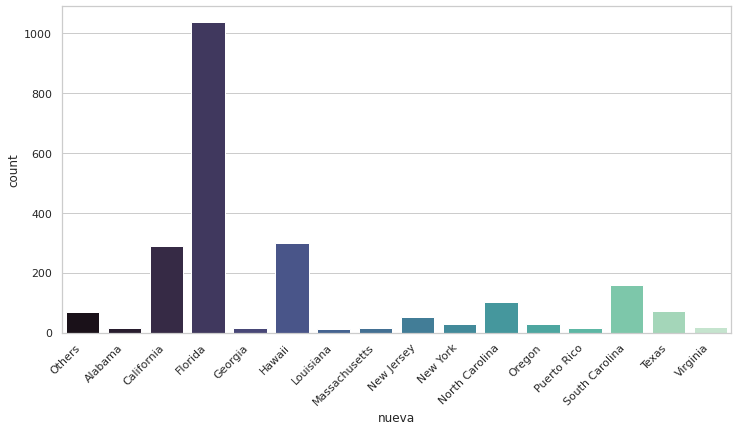

In [21]:
chart = sns.countplot(x=df2us.nueva,palette="mako")
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')


Here we can see that my hypothese is incorrect. Florida is the Area in the US with the most shark attacks, followed by
Hawaii
